DFT is used for **Spectral Decomposition** which concludes that a signal is nothing but a sum of sinusoids of different frequency components.<br><br>
In digital form, a signal is a set of samples in the time domain.<br><br>
The time domain contains the samples of the signal, whereas the frequency domain represents the spectrum of sinusoids that construct the signal.<br><br>
The continuous Fourier Transform assumes that your signal is defined for every point in time, but in practice, signals are sampled at discrete intervals.
### DFT
Let’s say we have a discrete signal $ x[n] $ with $ N $ samples, where $ n = 0, 1, 2, \dots, N-1 $.<br><br>
We assume that the signal is a periodic function which is a sum of sinusoids of different frequencies.<br><br>
We assume that the period of the signal is $ N $. **Intuition:** In most of the cases, we'll definitely sample at least one period of the signal. So, we are assuming that the number of samples given to us is one period of the signal.<br><br>
**Derivation:**<br>
the continuous Fourier Transform for a continuous-time signal $ x(t) $ is given by:<br>
$$
X(f) = \int_{-\infty}^{\infty} x(t) e^{-i 2 \pi f t} \, dt
$$
where $ X(f) $ is the fourier coefficient of the sinusoid of frequency $ f $. It can be thought of as the amplitude of the sinusoid of frequency $ f $ in the signal $ x(t) $.<br><br>
Let:
- $ f_s $ be the sampling frequency (the number of samples per second),
- $ \Delta t = \frac{1}{f_s} $ be the time interval between two consecutive samples.
**Time Discritization:**<br>
$$
t = n \Delta t
$$
**Frequency Discritization:**<br>
Maximum frequency is $ \frac{1}{T} $ where $ T $ is the period of the signal, $ T = N \Delta t $.<br>
Therefore, the frequency can be discritized as:<br>
$$
f_k = k \frac{1}{N \Delta t} 
$$

**DFT**:<br>
$$
\begin{align*}
X[k] = \sum_{n=0}^{N-1} x[n] e^{-i 2 \pi f_k t}
&= \sum_{n=0}^{N-1} x[n] e^{-i 2 \pi \frac{k}{N \Delta t} n \Delta t}\\
&= \sum_{n=0}^{N-1} x[n] e^{-i 2 \pi \frac{k}{N} n}\\
\end{align*}
$$

**Interpretation:**<br>
- DFT divides the frequency range from $0$ to $N$ equally spaced frequency bins. These bins correspond to the frequencies of the individual sinusoids that sum up to form the signal.
- For real-valued signals, the DFT produces both positive and negative frequency components. Here's how the frequencies are arranged in the DFT output $ X[k] $:
    - $ k = 0 $: The zero-frequency component (DC component).
    - $ k = 1, 2, \dots, \frac{N}{2} - 1 $: Positive frequency components.
    - $ k = \frac{N}{2} $: The **Nyquist frequency** (the highest frequency that can be captured, equal to $ \frac{f_s}{2} $).
    - $ k = \frac{N}{2} + 1, \dots, N - 1 $: Negative frequency components.
- For $ k = 0, 1, 2, \dots, \frac{N}{2} $, the frequency is $ f_k = \frac{k}{N} f_s $.
- For $ k = \frac{N}{2} + 1, \dots, N-1 $, the frequency $ f_k $ corresponds to negative frequencies $ f_k = \frac{k - N}{N} f_s $.
- **Note:** The sinusoidal component corresponding to $X[k]$ is $A_k \cos(2 \pi f_k t + \phi_k)$ where $A_k = |X[k]|$, $f_k = \frac{k}{N} f_s$ and $\phi_k = \arg(X[k])$.

### Inverse DFT
It can be proved that the inverse DFT is given by:<br>
$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{i 2 \pi \frac{k}{N} n}
$$

In [2]:
# Simple implementation of DFT and IDFT
import numpy as np
import matplotlib.pyplot as plt

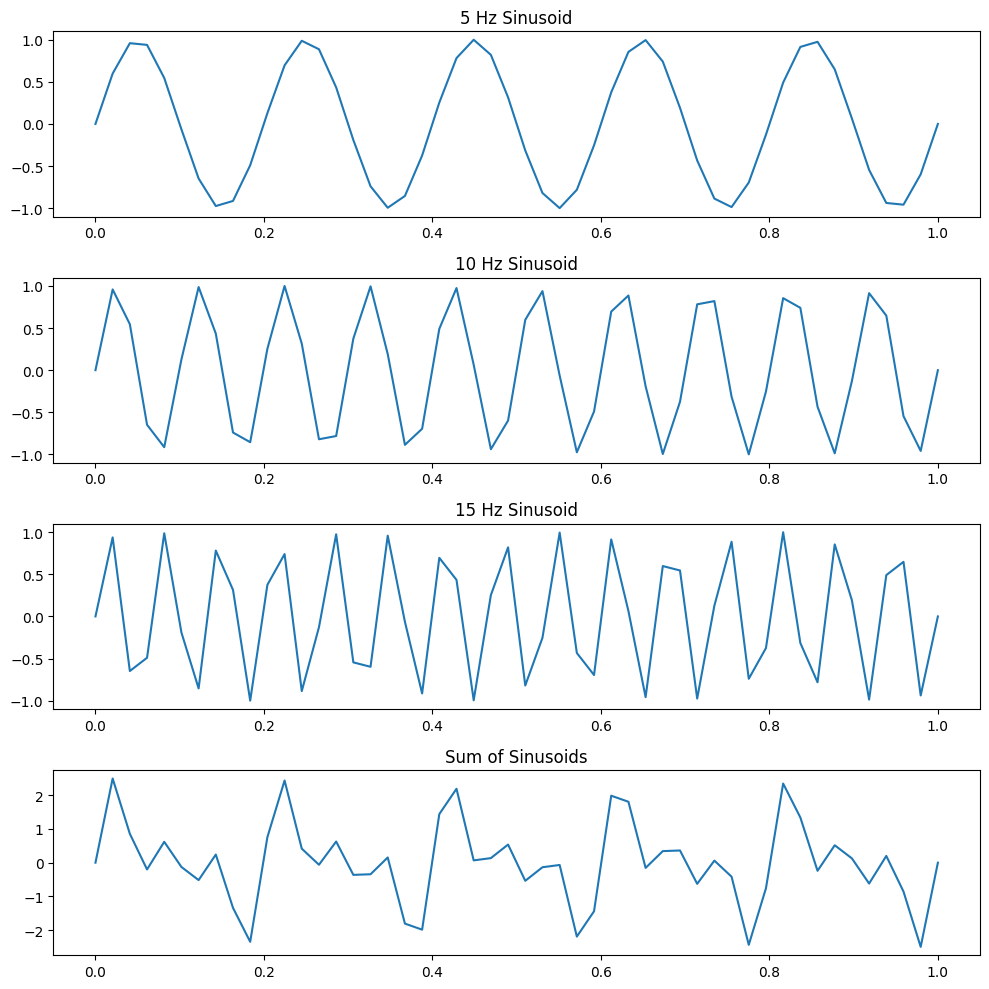

In [15]:
N = 50
t = np.linspace(0, 1, N)

# Frequencies of individual sinusoids
f1 = 5; s1 = np.sin(2*np.pi*f1*t)
f2 = 10; s2 = np.sin(2*np.pi*f2*t)
f3 = 15; s3 = np.sin(2*np.pi*f3*t)
# Minium 30 Hz sampling rate is required to avoid aliasing
# Here it is 50 Hz

# Sum of sinusoids
x = s1 + s2 + s3

# Plot the individual sinusoids and the sum
fig, ax = plt.subplots(4, 1, figsize=(10, 10))
ax[0].plot(t, s1)
ax[0].set_title('5 Hz Sinusoid')
ax[1].plot(t, s2)
ax[1].set_title('10 Hz Sinusoid')
ax[2].plot(t, s3)
ax[2].set_title('15 Hz Sinusoid')
ax[3].plot(t, x)
ax[3].set_title('Sum of Sinusoids')
plt.tight_layout()
plt.show()

Note that more the frequency of the sinusoid, more is the sampling frequency required to capture it. This is the reason why we can capture only frequencies upto $ \frac{f_s}{2} $ using DFT.

In [16]:
def dft(x):
    """
    Discrete Fourier Transform
    """
    N = x.shape[0]

    X = np.zeros(N, dtype=np.complex128)
    iota = 0.0 + 1.0j
    for k in range(N):
        for n in range(N):
            X[k] += x[n]*np.exp(-iota*2*np.pi*k*n/N)
    return X

In [17]:
x_dft = dft(x)

In [18]:
x_dft.shape

(50,)

In [19]:
def get_frequencies(N, d):
    """
    Get the frequencies of the DFT
    """
    # f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
    # f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd
    frequencies = np.zeros(N)
    if N % 2 == 0:
        for i in range(N):
            if i < N/2:
                frequencies[i] = i
            else:
                frequencies[i] = (i-N)
    else:
        for i in range(N):
            if i <= (N-1)/2:
                frequencies[i] = i
            else:
                frequencies[i] = (i-N)
    return frequencies / (d * N)

In [20]:
# np.fft.fftfreq(10, 0.1)
get_frequencies(10, 1/10), get_frequencies(11, 1/11)

(array([ 0.,  1.,  2.,  3.,  4., -5., -4., -3., -2., -1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5., -5., -4., -3., -2., -1.]))

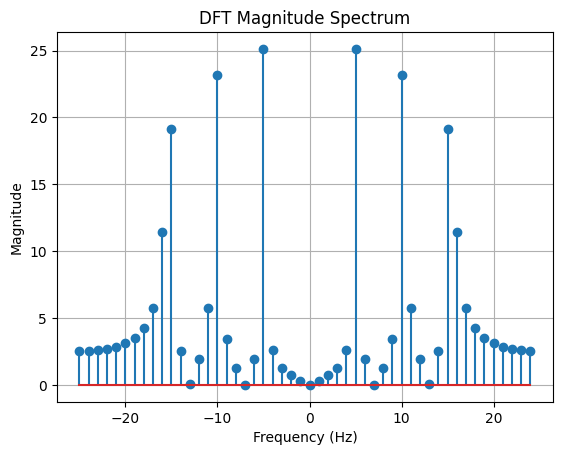

In [21]:
# Frequency bins and DFT magnitude
frequencies = get_frequencies(N, 1/N)
magnitudes = np.abs(x_dft)

# Plot magnitude spectrum
plt.stem(frequencies, magnitudes)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT Magnitude Spectrum')
plt.grid(True)
plt.show()

Note the magnitude peaks at 5 Hz, 10 Hz and 15 Hz. This is because the signal is a sum of sinusoids of these frequencies.

In [10]:
def inverse_dft(X):
    """
    Inverse Discrete Fourier Transform
    """
    N = X.shape[0]

    x = np.zeros(N, dtype=np.complex128)
    iota = 0.0 + 1.0j
    for n in range(N):
        for k in range(N):
            x[n] += X[k]*np.exp(iota*2*np.pi*k*n/N)
        x[n] /= N
    return x

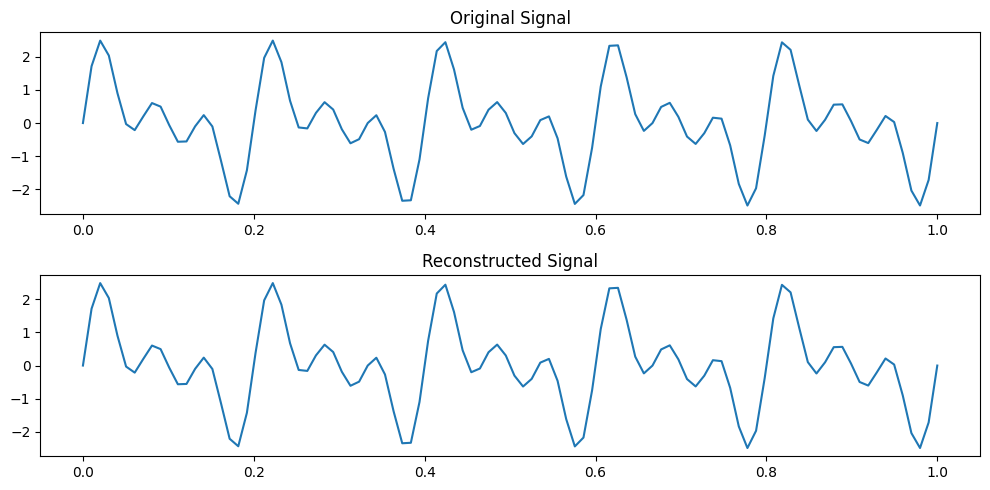

In [12]:
x_dft_inv = inverse_dft(x_dft)
x_dft_inv_real = x_dft_inv.real

# Plot the original and reconstructed signals
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
ax[0].plot(t, x)
ax[0].set_title('Original Signal')
ax[1].plot(t, x_dft_inv_real)
ax[1].set_title('Reconstructed Signal')
plt.tight_layout()
plt.show()

In [14]:
np.max(np.abs(x_dft_inv.imag))

4.852840351787791e-14